In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/pattern project/drinking_dataset.csv')
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,48,126,92,17.1,1,1.0,21,35,40,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,55,148,121,15.8,1,0.9,20,36,27,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,41,74,104,15.8,1,0.9,47,32,68,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,76,104,106,17.6,1,1.1,29,34,18,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,61,117,104,13.8,1,0.8,19,12,25,N


In [ ]:
dataset.shape

(991346, 23)

In [ ]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
DRK_YN               object
dtype: object

In [ ]:
n = 1
for (columnName, columnData) in dataset.iteritems():
    if columnData.dtype == 'O':
        print('S.no   : ', n)
        print('Name   : ', columnName)
        print('Unique : ', columnData.unique())
        print('No     : ',len(columnData.unique()))
        print()
        n+=1
    else:
        pass

S.no   :  1
Name   :  sex
Unique :  ['Male' 'Female']
No     :  2

S.no   :  2
Name   :  DRK_YN
Unique :  ['Y' 'N']
No     :  2



<ipython-input-72-939197d42552>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in dataset.iteritems():


In [ ]:
# Import necessary library
import pandas as pd

# Assuming 'dataset' is your DataFrame and 'class' is your target column
class1 = dataset[dataset['DRK_YN'] == 'Y']
class2 = dataset[dataset['DRK_YN'] == 'N']

# Randomly sample 15k data from each class
sampled_class1 = class1.sample(n=30000, random_state=1)
sampled_class2 = class2.sample(n=30000, random_state=1)

# Concatenate the two DataFrames
dataset= pd.concat([sampled_class1, sampled_class2])


print(dataset)


           sex  age  height  weight  waistline  sight_left  sight_right  \
443544    Male   55     165      65       79.0         1.0          1.2   
709129  Female   45     155      45       75.0         0.8          0.9   
807719    Male   35     170      65       91.0         0.9          1.0   
600957  Female   30     160      55       69.0         1.0          1.0   
54902     Male   45     165      75       90.7         1.2          0.9   
...        ...  ...     ...     ...        ...         ...          ...   
435729  Female   55     160      65       82.0         1.0          1.2   
127685  Female   60     140      50       77.0         0.7          0.7   
174446  Female   55     155      45       70.0         0.8          0.7   
14390   Female   45     155      70       98.8         0.7          0.6   
74710   Female   60     150      50       71.0         0.9          1.0   

        hear_left  hear_right  SBP  ...  HDL_chole  LDL_chole  triglyceride  \
443544          1   

In [ ]:
# Shuffle the DataFrame
dataset = dataset.sample(frac=1, random_state=1)

print(dataset)

           sex  age  height  weight  waistline  sight_left  sight_right  \
346389    Male   30     175      70       87.3         1.5          1.5   
531149    Male   60     165      75       89.0         0.7          1.2   
957561    Male   60     170      75       92.2         0.8          0.7   
288858  Female   20     170      55       64.0         0.8          0.4   
491680  Female   60     160      65       82.0         0.5          0.5   
...        ...  ...     ...     ...        ...         ...          ...   
962506    Male   55     170      55       79.1         1.0          1.0   
129759    Male   45     170      85       97.0         1.0          0.9   
189234    Male   40     165      75       89.0         1.2          1.0   
209609    Male   45     160      60       73.7         1.2          0.8   
412936    Male   80     155      55       79.0         0.8          1.0   

        hear_left  hear_right  SBP  ...  HDL_chole  LDL_chole  triglyceride  \
346389          1   

<ipython-input-75-ca99fd9a2186>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,3,idx+1)


[]

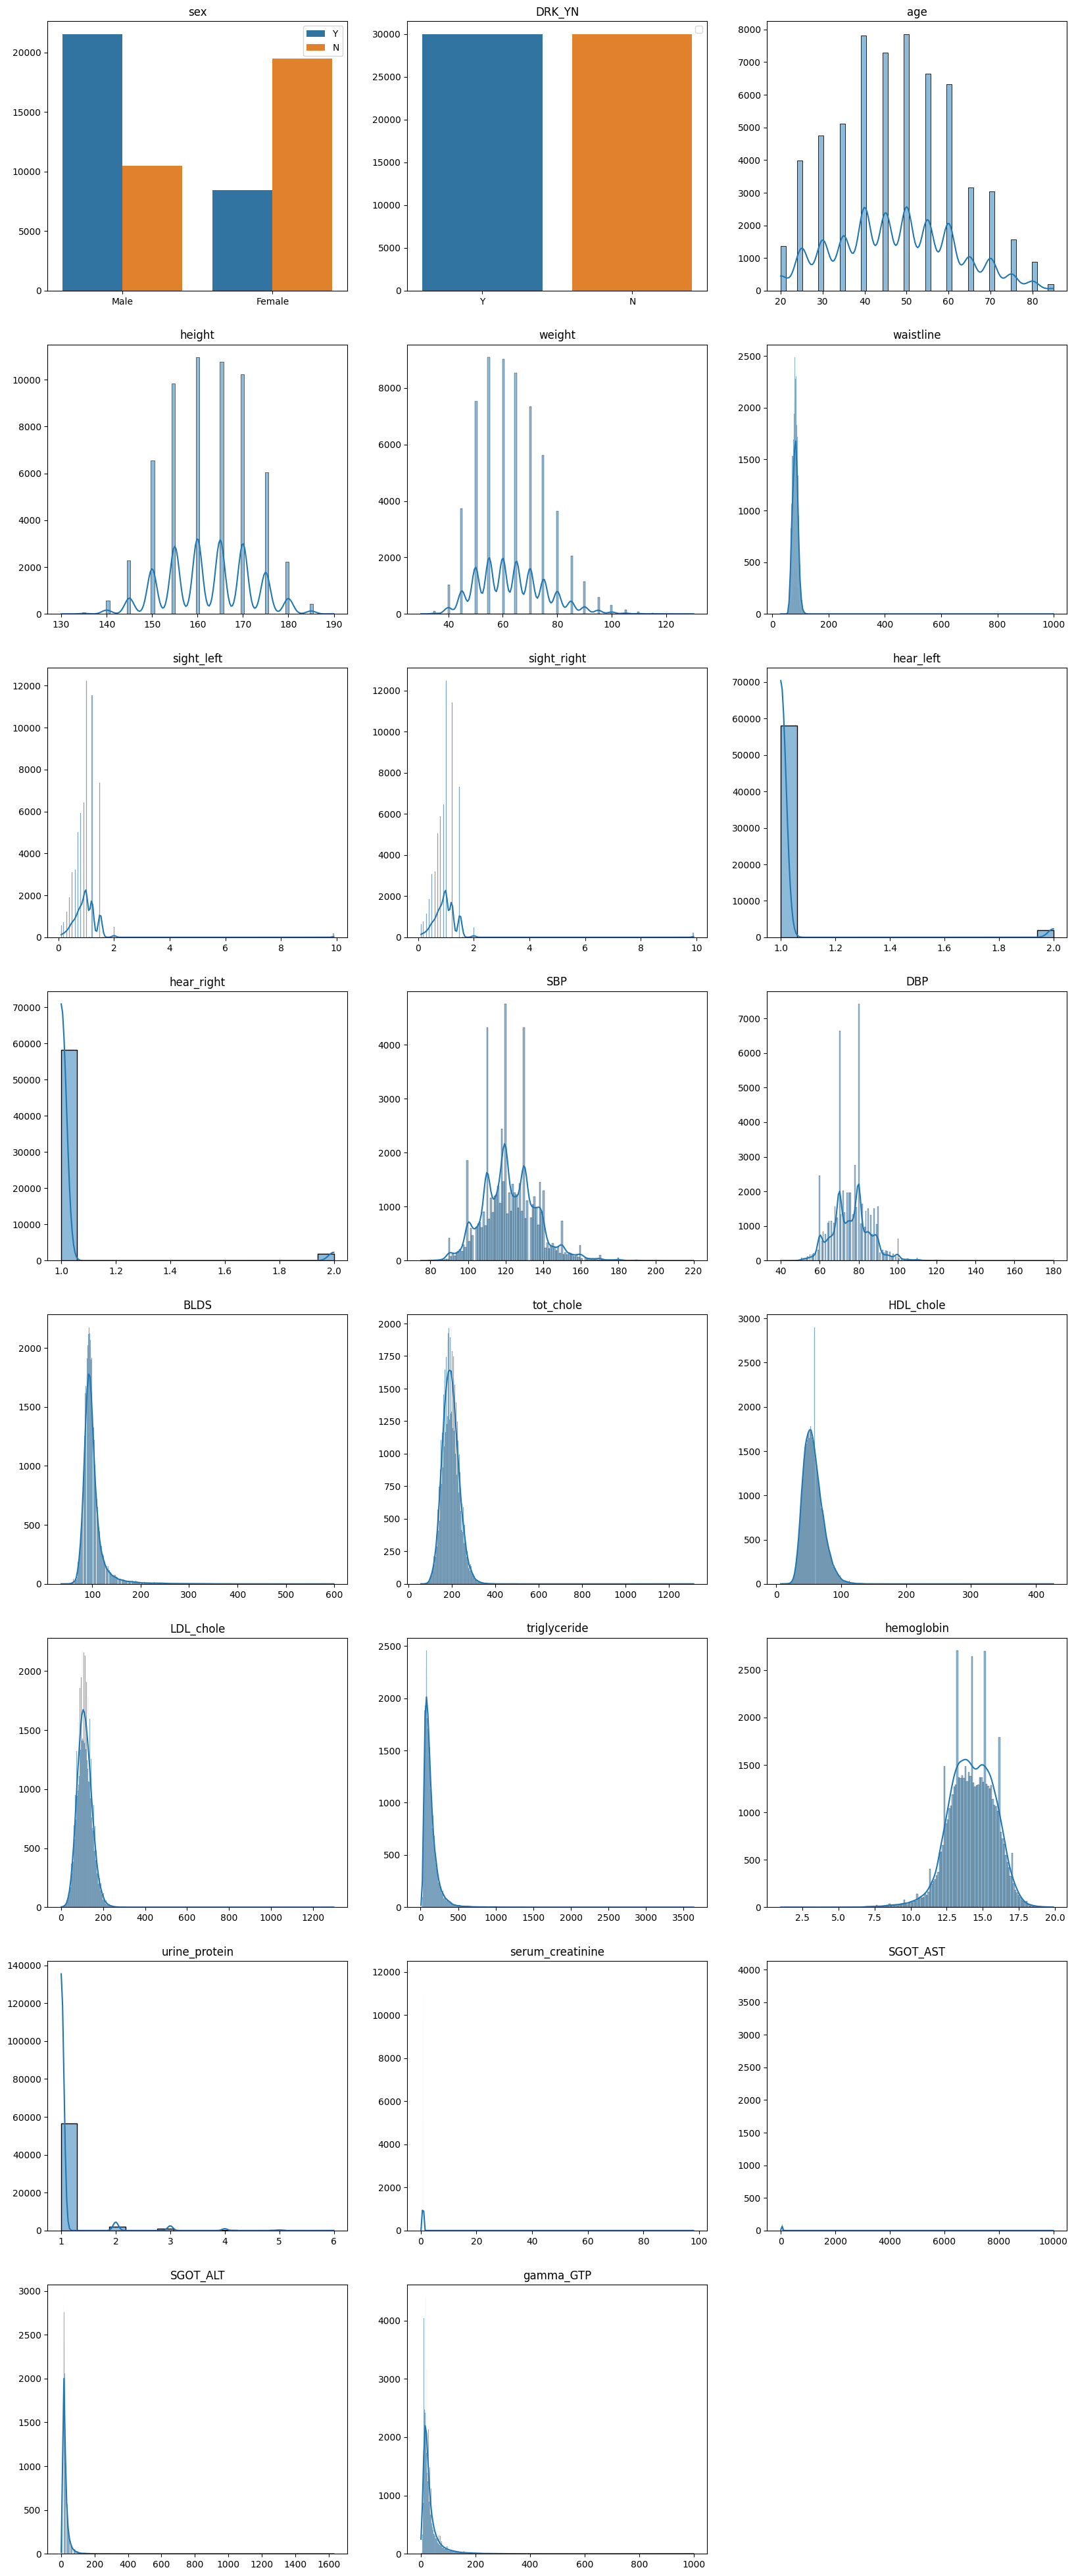

In [ ]:
object_cols = ['sex','DRK_YN']
num_cols = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left','hear_right','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']
fig,ax = plt.subplots(figsize = (20, 50))
idx = 0
for i in object_cols:
    plt.subplot(8,3,idx+1)
    sns.countplot(x = i, data = dataset, hue = dataset['DRK_YN'])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(i)
    plt.legend()
    idx += 1

for i in num_cols:
    plt.subplot(8,3,idx+1)
    sns.histplot(x = dataset[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx += 1

plt.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols:
  dataset[i] = le.fit_transform(dataset[i])

dataset.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
346389,1,30,175,70,87.3,1.5,1.5,1,1,109,...,52,104,77,14.4,1,0.9,17,20,15,1
531149,1,60,165,75,89.0,0.7,1.2,1,1,120,...,51,194,76,16.4,1,1.1,31,36,42,1
957561,1,60,170,75,92.2,0.8,0.7,1,1,142,...,62,166,69,15.5,1,1.1,17,18,37,0
288858,0,20,170,55,64.0,0.8,0.4,1,1,105,...,84,70,57,13.9,1,0.8,20,26,17,1
491680,0,60,160,65,82.0,0.5,0.5,2,1,115,...,52,161,92,12.0,1,0.8,43,54,34,0


In [ ]:
dataset.dtypes

sex                   int64
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
DRK_YN                int64
dtype: object

In [ ]:
dataset.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.534083,47.504167,162.349500,63.426917,81.306648,0.984035,0.983508,1.031600,1.031183,122.443800,...,56.887333,112.724600,132.218750,14.242560,1.096100,0.862910,26.182883,25.861750,37.432100,0.500000
std,0.498841,14.202142,9.304593,12.547182,12.734215,0.615610,0.620933,0.174934,0.173814,14.538476,...,15.000080,35.117039,102.201594,1.582714,0.442155,0.723096,44.883766,23.727741,52.891386,0.500004
min,0.000000,20.000000,130.000000,30.000000,30.000000,0.100000,0.100000,1.000000,1.000000,75.000000,...,7.000000,1.000000,6.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.300000,0.700000,0.700000,1.000000,1.000000,112.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,0.000000
50%,1.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,0.500000
75%,1.000000,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,...,66.000000,135.000000,158.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,1.000000
max,1.000000,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,220.000000,...,427.000000,1298.000000,3632.000000,19.900000,6.000000,98.000000,9999.000000,1631.000000,999.000000,1.000000


In [ ]:
dataset.corr()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
sex,1.000000,-0.088506,0.723879,0.584562,0.319616,0.094387,0.097935,-0.005658,0.000525,0.175105,...,-0.298998,-0.003740,0.214482,0.671931,0.015753,0.162522,0.052066,0.218501,0.251811,0.369159
age,-0.088506,1.000000,-0.398213,-0.196747,0.115094,-0.165104,-0.157559,0.205664,0.202888,0.261230,...,-0.121144,0.029625,0.046753,-0.178295,0.045548,0.013356,0.031277,-0.024051,0.017742,-0.283938
height,0.723879,-0.398213,1.000000,0.672481,0.247617,0.128229,0.131526,-0.089491,-0.084103,0.032534,...,-0.174020,-0.011272,0.137464,0.532985,0.002381,0.112124,0.023969,0.160816,0.162810,0.376985
weight,0.584562,-0.196747,0.672481,1.000000,0.591079,0.090416,0.084675,-0.049831,-0.050071,0.245171,...,-0.335728,0.070331,0.283237,0.501112,0.027145,0.099753,0.046813,0.308823,0.214077,0.264530
waistline,0.319616,0.115094,0.247617,0.591079,1.000000,0.010883,0.007643,0.027564,0.026728,0.246919,...,-0.270314,0.059224,0.233472,0.266376,0.049561,0.057960,0.043784,0.222540,0.168693,0.083885
sight_left,0.094387,-0.165104,0.128229,0.090416,0.010883,1.000000,0.316818,-0.038758,-0.047855,-0.026692,...,-0.006657,0.010179,0.012777,0.079553,-0.008967,0.017053,-0.003779,0.018307,0.012162,0.074526
sight_right,0.097935,-0.157559,0.131526,0.084675,0.007643,0.316818,1.000000,-0.042692,-0.037502,-0.024748,...,-0.007090,0.009164,0.011663,0.084787,-0.013738,0.013460,-0.005832,0.018696,0.011791,0.073221
hear_left,-0.005658,0.205664,-0.089491,-0.049831,0.027564,-0.038758,-0.042692,1.000000,0.552463,0.052725,...,-0.028560,-0.009674,0.003626,-0.043793,0.016979,0.006327,0.004091,-0.010861,-0.001652,-0.056212
hear_right,0.000525,0.202888,-0.084103,-0.050071,0.026728,-0.047855,-0.037502,0.552463,1.000000,0.055512,...,-0.029912,-0.012123,0.004849,-0.037934,0.019995,0.008115,0.004881,-0.011313,0.003790,-0.055711
SBP,0.175105,0.261230,0.032534,0.245171,0.246919,-0.026692,-0.024748,0.052725,0.055512,1.000000,...,-0.127564,0.029658,0.184368,0.166674,0.058783,0.037926,0.035312,0.129927,0.158312,0.034933


In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['DRK_YN'])
y = dataset['DRK_YN']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 30)

print(x_train.shape, x_test.shape)

(48000, 22) (12000, 22)


Accuracy score:  0.7245833333333334
F1 score:  0.7240083507306889
Precision score:  0.7249163879598662
Recall score:  0.7231025854879066


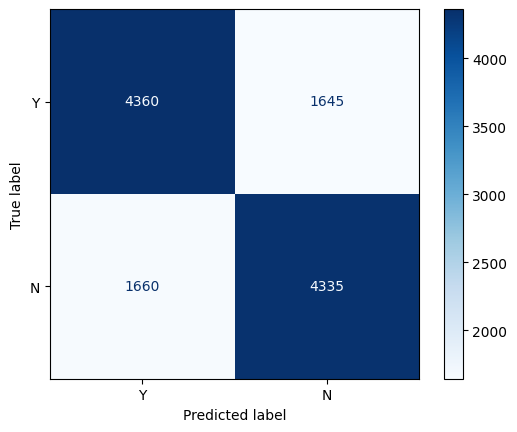

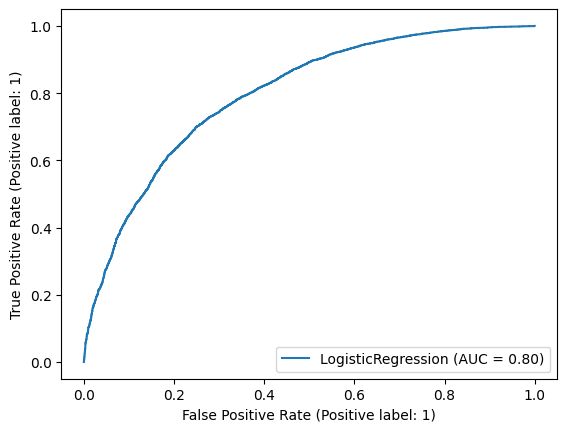

In [ ]:
clf = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=0).fit(x_train, y_train)
Y_pred = clf.predict(x_test)


cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

cmd.plot(cmap=plt.cm.Blues)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)

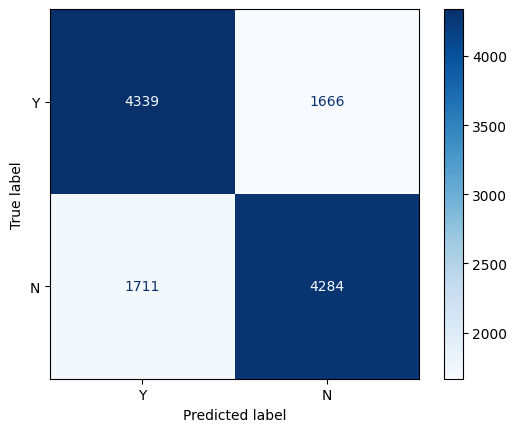

Accuracy score:  0.7185833333333334
F1 score:  0.717287568020092
Precision score:  0.72
Recall score:  0.7145954962468724


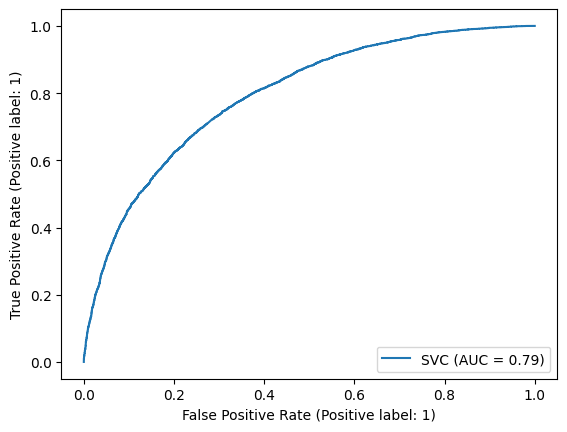

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=0, probability=True)
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()


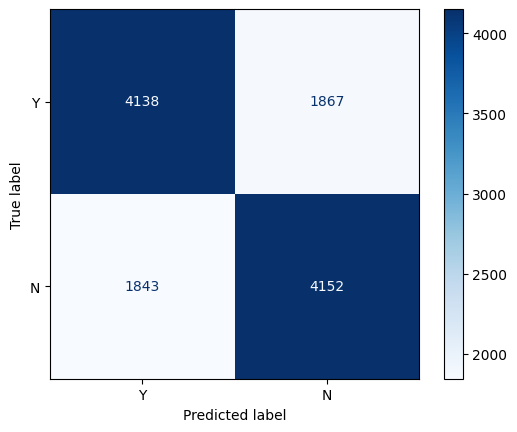

Accuracy score:  0.6908333333333333
F1 score:  0.6911936074579658
Precision score:  0.6898155839840505
Recall score:  0.6925771476230191


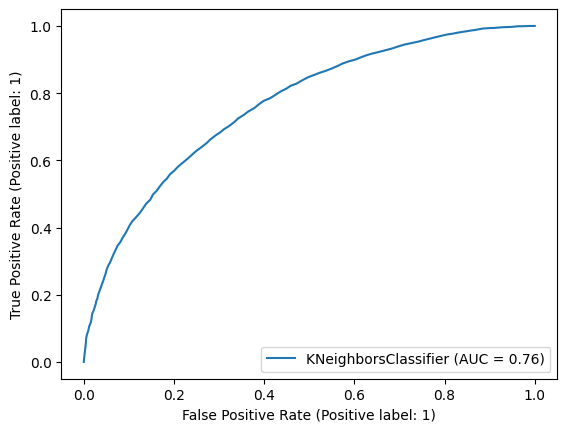

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = KNeighborsClassifier(n_neighbors=173)
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()


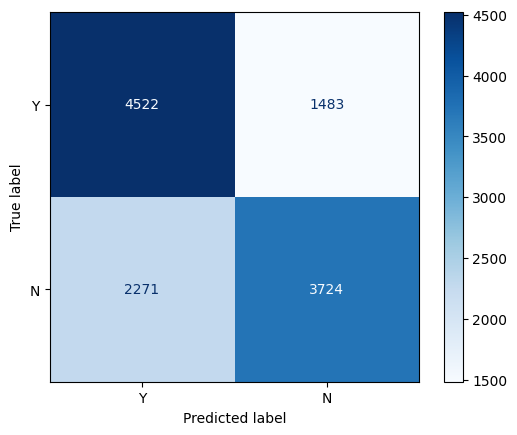

Accuracy score:  0.6871666666666667
F1 score:  0.664881271201571
Precision score:  0.7151910889187632
Recall score:  0.6211843202668891


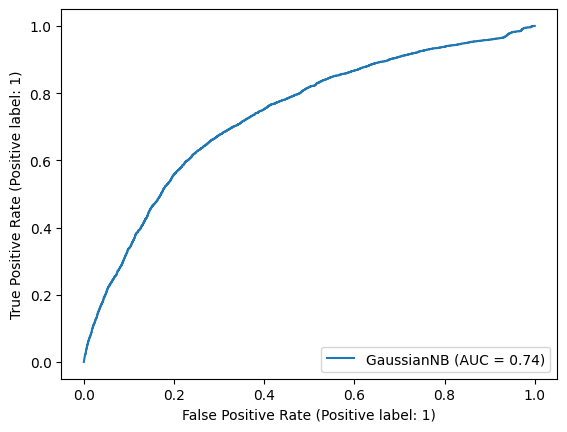

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = GaussianNB()
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()


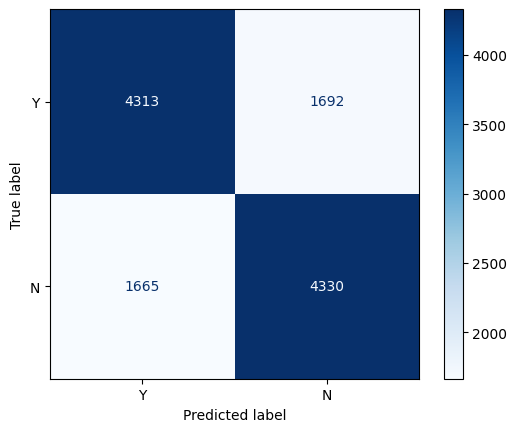

Accuracy score:  0.72025
F1 score:  0.7206457518515437
Precision score:  0.7190302225174361
Recall score:  0.7222685571309424


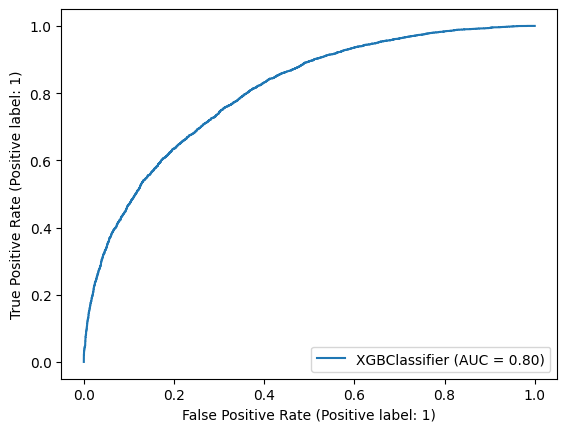

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()


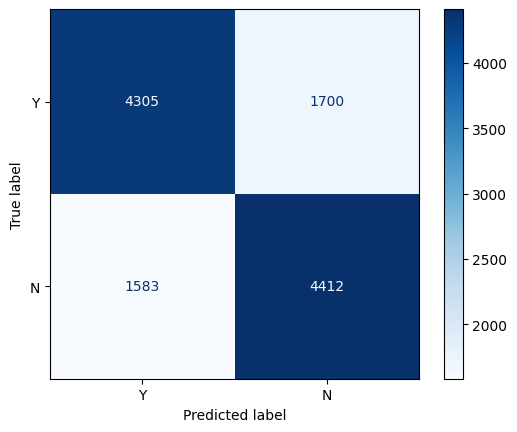

Accuracy score:  0.7264166666666667
F1 score:  0.7288345585198645
Precision score:  0.7218586387434555
Recall score:  0.7359466221851543


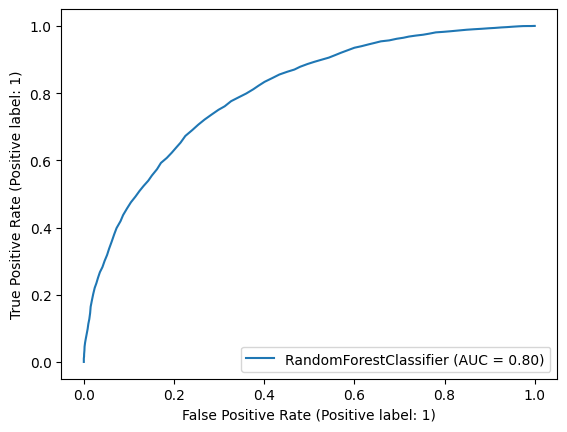

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()


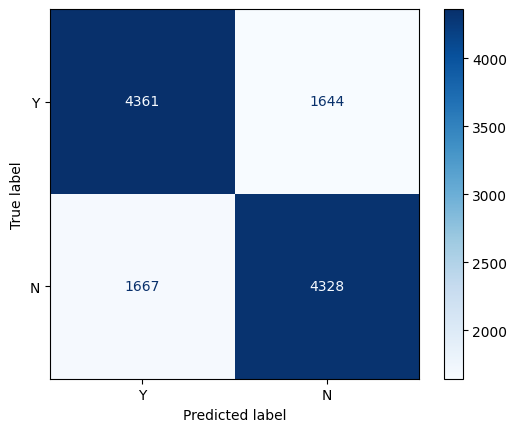

Accuracy score:  0.7240833333333333
F1 score:  0.7233224701261802
Precision score:  0.724715338245144
Recall score:  0.7219349457881568


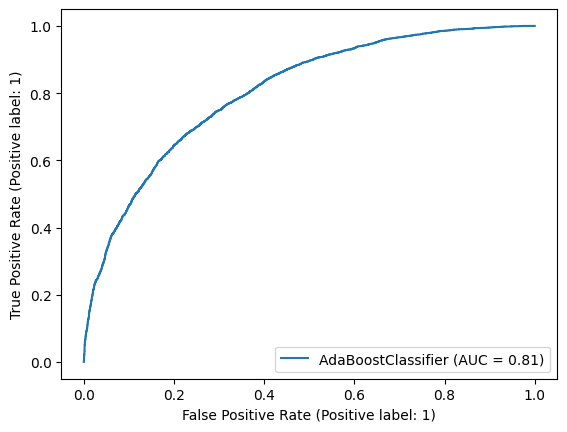

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

# Make predictions
Y_pred = clf.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()
